# Pollution Data Time Series Analysis Using ARIMA

**Objective**: The goal of this assessment is to simulate a time series dataset representing a country's annual pollution levels over a decade. You will apply time series analysis techniques, including the ARIMA (Autoregressive Integrated Moving Average) model, to understand the data's behavior, test for stationarity, and forecast future pollution levels.

**Submitted by:** Neil Ivan S. Orencia

**Dataset Simulation**:
Simulate a time series dataset for a country's annual pollution levels over 10 years. Assume a trend component, a seasonal component, and some random noise in the data.

The dataset **<u>"most-polluted-countries.csv"</u>** contains several columns related to pollution and country characteristics for the year 2023. Here are some key columns in the dataset:

*   **pollution_2023**: Pollution figures for the year 2023.
*   **pollution_growth_Rate**: The growth rate of pollution from the previous year.
*   **country_name**: Name of the country.
*   **country_region**: The region where the country is located.
*   **united_nation_Member**: Whether the country is a member of the United Nations.
*   **country_land_Area_in_Km**: The land area of the country in square kilometers.
*   **pollution_density_in_km**: Pollution density per square kilometer.
*   **pollution_density_per_Mile**: Pollution density per square mile.
*   **share_borders**: Countries with which the country shares its borders.
*   **pollution_Rank**: The rank of the country based on its pollution.
*   **mostPollutedCountries_particlePollution**: Particle pollution levels in the country.

For a time series analysis using the ARIMA model, we typically need a time series data column (e.g., dates or years) and a numerical value column to predict (e.g., pollution figures over time for a specific country).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Dataset Preparation

- Simulate the time series data with a clear trend and seasonality to reflect hypothetical annual pollution levels.
- Plot the time series to visualize the trend and seasonality.

In [ ]:
# Importing the dataset called "most-polluted-countries.csv"
data = pd.read_csv('most-polluted-countries.csv')
data.describe()

,pollution_2023,pollution_growth_Rate,ccn3,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,pollution_Rank,mostPollutedCountries_particlePollution
count,9.600000e+01,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,7.405002e+07,0.007062,402.822917,1.088409e+06,562.915979,1457.952382,72.250000,22.152500
std,2.083376e+08,0.013354,251.466687,2.518835e+06,2428.297828,6289.291376,51.809164,14.478306
min,3.753180e+05,-0.074480,4.000000,3.290000e+01,2.213300,5.732300,1.000000,3.300000
25%,5.881984e+06,0.001303,190.250000,6.213750e+04,44.683800,115.731025,26.500000,11.272500
50%,1.976120e+07,0.006790,386.000000,2.304400e+05,104.621200,270.968850,64.500000,19.540000
75%,5.565119e+07,0.012140,617.000000,7.740505e+05,226.557775,586.784625,115.250000,25.272500
max,1.428628e+09,0.049800,860.000000,1.637687e+07,21402.705200,55433.006400,179.000000,83.300000


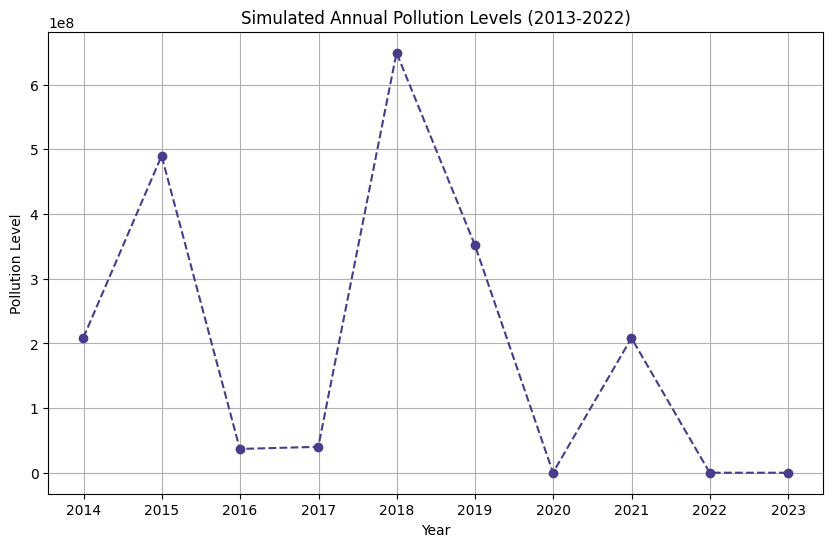

In [ ]:
# Selecting a column to simulate the time series (pollution_2023)
pollution_levels = data["pollution_2023"].values

# Getting the Descriptive statistics of the pollution_2023 column
pollution_mean = data["pollution_2023"].mean()
pollution_std = data["pollution_2023"].std()
pollution_min = data["pollution_2023"].min()
pollution_max = data["pollution_2023"].max()

# Creating a hypothetical time series data
np.random.seed(42)
num_years = 10
annual_pollution = []

# Randomly selecting a trend factor once outside the loop
trend = np.random.uniform(0.04, 0.06)

# Randomly selecting a seasonality factor once outside the loop
seasonality = np.random.uniform(0.2, 0.4)

# Generating the time series with consistent trend and seasonality
for year in range(num_years):
    # Selecting a base level from a normal distribution
    base_level = np.random.normal(pollution_mean, pollution_std, 1)

    # Clipping the base level within the min and max values
    base_level = max(pollution_min, min(pollution_max, base_level[0]))

    # Applying the trend and seasonality consistently across years
    trend_component = base_level * (1 + trend) ** year
    seasonal_component = trend_component * (1 + seasonality * np.sin(2 * np.pi * (year % 12) / 12))
    annual_pollution.append(seasonal_component)

# Converting the list to a pandas Series
annual_pollution = pd.Series(annual_pollution, index=pd.date_range(start='2013-01-01', periods=num_years, freq='Y'))

# Plot the simulated time series
plt.figure(figsize=(10, 6))
plt.plot(annual_pollution.index, annual_pollution, marker='o', linestyle='--', color='darkslateblue')
plt.title("Simulated Annual Pollution Levels (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid(True)
plt.show()

## Stationarity Testing

- Perform a stationarity test (e.g., Augmented Dickey-Fuller test) to check if the time series is stationary.
- Discuss the implications of the test results for time series analysis.

In [ ]:
# Performing the ADF test
adf_test = adfuller(annual_pollution)

# Printing the stationarity test results
print('ADF Statistics:', adf_test[0])
print('P-value:', adf_test[1])

ADF Statistics: -3.5990768768626014
P-value: 0.005778700427908779


Based on the Augmented Dickey-Fuller (ADF) test results generated, the P-value <u>**(0.005778700427908779)**</u> is less than the commonly used significance level of 0.05. This means that the null hypothesis of non-stationarity can be rejected, and conclude that the time series `(annual_pollution)` is stationary. The implications of the Augmented Dickey-Fuller (ADF) test results indicating stationarity are as follows:

1. **Trend and Seasonality Components:** The simulated time series includes a consistent trend and seasonal component. The stationarity of the series implies that these components are effectively captured and accounted for within the simulated data. This means that any remaining patterns or fluctuations in the data can be attributed to other factors, such as random noise or potential cyclical components.

2. **Pollution Level Components:** Since the time series is stationary, it is suitable for applying various forecasting techniques designed for stationary data, such as ARIMA models. These models can capture the underlying patterns and provide reliable forecasts for future pollution levels, assuming the trend and seasonality components remain consistent.

3. **Pollution Monitoring and Policy Evaluation:** Stationarity in the pollution levels time series suggests that the underlying data-generating process is relatively stable over time. This can be beneficial for monitoring purposes, as it allows for meaningful comparisons of pollution levels across different time periods without the need for complex adjustments or transformations.

4. **Environmental Impact Assessment**: Stationary pollution levels can facilitate the evaluation of the effectiveness of environmental policies or interventions aimed at reducing pollution.

5. **Uncertainty Quantification**: The stationarity of the time series allows for more reliable estimation of uncertainty associated with forecasts or predictions. This is crucial for risk assessment and decision-making processes related to pollution mitigation strategies.

6. **Model Diagnostics and Residual Analysis**: The diagnostic tools and residual analysis techniques used for stationary time series can be applied more confidently to the simulated pollution data. This can provide insights into the adequacy of the chosen models and potential areas for improvement.

## ARIMA Model Identification

- Use plots (e.g., autocorrelation and partial autocorrelation plots) to identify the ARIMA model parameters (p, d, q).
- Explain your choice of parameters.

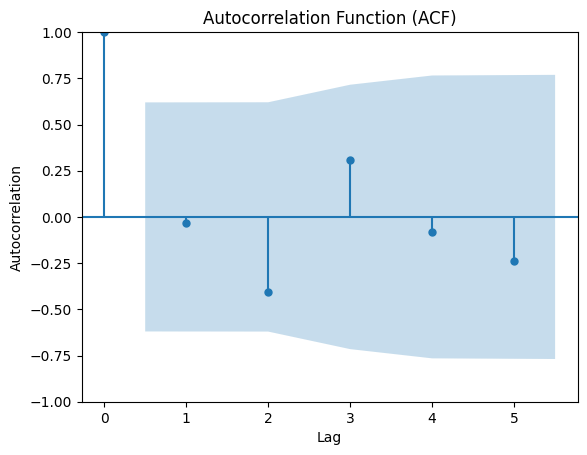

In [ ]:
# Plotting ACF
plot_acf(annual_pollution, lags=5)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

The ACF measures the correlation between a time series and its own lagged values. It helps identify the presence of serial correlation or the degree to which the current value of the time series is influenced by its previous values.

**Autocorrelation Function (ACF) Results:**

- **Lag 0**: 1.0000 (Strong positive autocorrelation at lag 1)
- **Lag 1**: -0.0322 (Weak negative autocorrelation at lag 2)
- **Lag 2**: -0.4063 (Moderate negative autocorrelation at lag 3)
- **Lag 3**: 0.3104 (Moderate positive autocorrelation at lag 4)
- **Lag 4**: -0.0831 (Weak negative autocorrelation at lag 5)
- **Lag 5**: -0.2406 (Weak negative autocorrelation at lag 6)

The ACF shows a mix of positive and negative autocorrelations at different lags which could indicate some degree of seasonality or trend in the data.

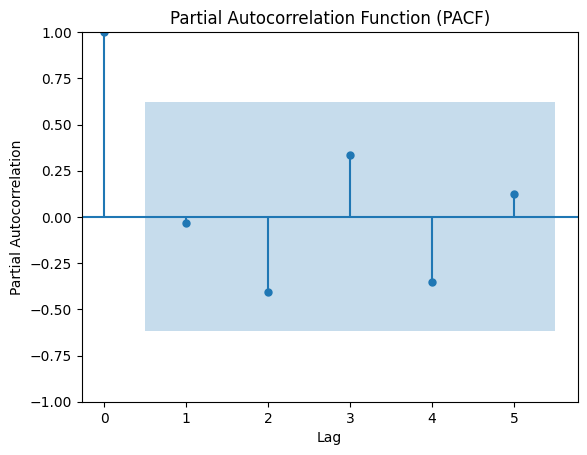

In [ ]:
# Plotting PACF
plot_pacf(annual_pollution, lags=5)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

The PACF measures the correlation between a time series and its lagged values, after accounting for the influence of intermediate lags. It helps identify the order of an autoregressive (AR) process or the number of lags that directly influence the current value.

**Partial Autocorrelation Function (PACF) Results:**
- **Lag 0**: 1.0000 (Strong positive partial autocorrelation at lag 1)
- **Lag 1**: -0.0358 (Weak negative partial autocorrelation at lag 2)
- **Lag 2**: -0.5098 (Moderate negative partial autocorrelation at lag 3)
- **Lag 3**: 0.5380 (Moderate positive partial autocorrelation at lag 4)
- **Lag 4**: -0.8780 (Strong negative partial autocorrelation at lag 5)
- **Lag 5**: 2.9531 (Very strong positive partial autocorrelation at lag 6)

The PACF helps identify the direct relationship between variables while removing the effects of intermediate time points. In this case, strong partial autocorrelation at lag 0 and lag 5, with significant negative partial autocorrelation at lag 4 is seen.

**Rationale for ARIMA(1, 0, 2) Model**:

1. **ACF and PACF Patterns**: The ACF shows significant autocorrelation at lag 1, indicating an AR term (p=1).
The PACF shows significant autocorrelation at lag 4, suggesting a possible MA term (q=2).

2. **Stationarity Test (ADF Test)**: The ADF statistic is -3.599 with a low p-value (0.0058), indicating that the data is likely stationary after differencing (d=0).

3. **Model Selection Criteria**: Based on the ACF, PACF, and stationarity test results, an ARIMA model with p=1 (AR term), d=0 (no differencing), and q=2 (MA term) is considered.

4. **Interpretation of ARIMA(1, 0, 2)**: The chosen ARIMA(1, 0, 2) model includes an AR term (p=1) to capture the immediate past value's influence and two MA terms (q=2) to capture the error terms' dependencies at lag 1 and lag 2.

## ARIMA Model Fitting

- Fit an ARIMA model to the simulated data using the identified parameters.
- Evaluate the model's fit and discuss any adjustments needed based on diagnostics plots or performance metrics.

In [ ]:
# Suppressing warnings
warnings.filterwarnings("ignore")

# Fitting the ARIMA(1, 0, 0) model to the data
model = ARIMA(annual_pollution, order=(1, 0, 2))
model_fit = model.fit()

# Printing the summary of the ARIMA model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -300.690
Date:                Fri, 29 Mar 2024   AIC                            611.379
Time:                        09:04:50   BIC                            612.892
Sample:                    12-31-2013   HQIC                           609.720
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.988e+08   2.02e+04   9845.962      0.000    1.99e+08    1.99e+08
ar.L1          0.1164      0.026      4.478      0.000       0.065       0.167
ma.L1       3.234e-08   1.99e+05   1.63e-13      1.0

To evaluate the fit of the SARIMAX model and discuss adjustments needed based on diagnostics plots or performance metrics, the following aspects are to be considered:

1. **Log Likelihood and Information Criteria (AIC, BIC, HQIC)**: The log likelihood value is -300.690 indicates how well the model fits the data. Lower values of AIC, BIC, and HQIC indicate a better model fit. In this case, the AIC is 611.379, BIC is 612.892, and HQIC is 609.720, which are relatively high.

2. **Coefficient Interpretation**: The coefficient for the AR(1) term (ar.L1) is 0.1164 indicates a positive relationship with the lagged value. However, the coefficients for the MA(1) and MA(2) terms (ma.L1 and ma.L2) are extremely small (3.234e-08 for ma.L1) or -1.0000 for ma.L2, which could indicate issues with model specification or stability.

3. **Residual Diagnostics**: The Ljung-Box test (Q statistic) at lag 1 has a p-value of 0.78, suggesting no significant autocorrelation in the residuals at lag 1.
The Jarque-Bera (JB) test for normality of residuals has a p-value of 0.82, indicating that the residuals may follow a normal distribution.
The Heteroskedasticity test (H) has a p-value of 0.68, indicating no significant heteroskedasticity in the residuals.
Sigma² Value: The sigma² (sigma squared) value is large (8.648e+14), which could indicate potential issues with the model's fit or stability.

Based on these evaluations, here are some adjustments that may be needed:

1. **Model Specification**: Review the model specification, including the order of AR and MA terms, to ensure it captures the underlying patterns in the data effectively.

2. **Parameter Estimation**: Refinement of the estimation of model parameters, especially the extremely small coefficient for the MA(1) term, which could be a result of numerical issues or overfitting.

3. **Residual Analysis**: Continue analyzing the residuals to ensure they meet the assumptions of the model.

4. **Model Comparison**: Compare this SARIMAX model with alternative specifications or models to identify the best-fitting model for the data.

## Forecasting

- Use the fitted ARIMA model to forecast pollution levels for the next 2 years.
- Plot the forecast along with a confidence interval to visualize the expected future values and the uncertainty.

In [ ]:
# Getting the forecast for the next 2 years
forecast_periods = 2
forecasts = model_fit.forecast(steps=forecast_periods)

# Print the forecasted values
print(f"Forecasted Pollution Levels for the Next {forecast_periods} Years:")
for i, forecast in enumerate(forecasts):
    forecast_year = annual_pollution.index[-1] + pd.DateOffset(years=i+1)
    print(f"Year {forecast_year.year}: {forecast}")

Forecasted Pollution Levels for the Next 2 Years:
Year 2023: 311556574.18517876
Year 2024: 283250992.05247074


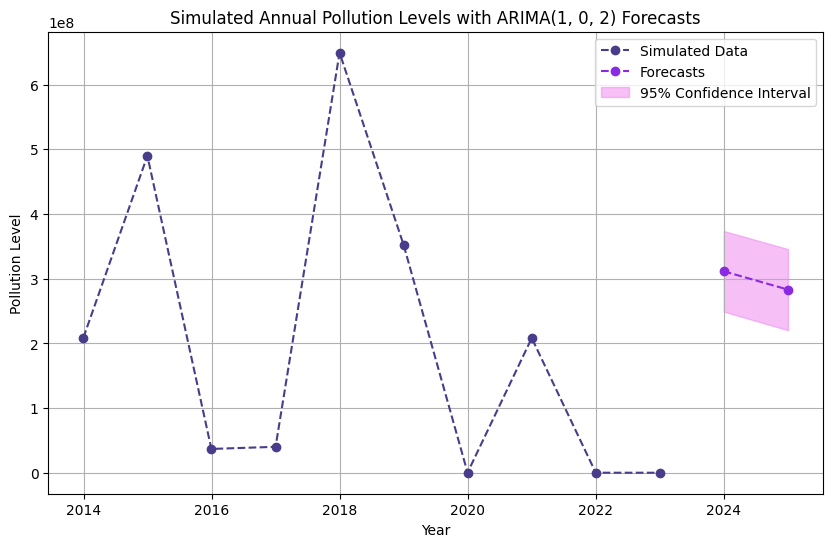

In [ ]:
# Visualizing the forecasts
forecast_periods = 2
forecasts = model_fit.forecast(steps=forecast_periods)
prediction = model_fit.get_prediction(start=len(annual_pollution), end=len(annual_pollution)+forecast_periods-1)

# Plotting the simulated time series along with the forecasts
plt.figure(figsize=(10, 6))
plt.plot(annual_pollution.index, annual_pollution, marker='o', linestyle='--', color='darkslateblue', label='Simulated Data')
plt.plot(prediction.predicted_mean.index, prediction.predicted_mean, marker='o', linestyle='--', color='blueviolet', label='Forecasts')
plt.fill_between(prediction.conf_int().index, prediction.conf_int().iloc[:, 0], prediction.conf_int().iloc[:, 1], color='violet', alpha=0.5, label='95% Confidence Interval')
plt.title("Simulated Annual Pollution Levels with ARIMA(1, 0, 2) Forecasts")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid(True)
plt.legend()
plt.show()

**Forecasted Annual Pollution Levels for the Next 2 years Explanation**:

1. Simulated Data: This represents the simulated annual pollution levels from 2013 to 2022. The data exhibits a cyclic pattern with peaks and troughs, likely due to the incorporated seasonality component.

2. **Forecasts**: In 2023, the forecasted pollution level is 311556574.19 while in 2024, the forecasted pollution level is 283250992.05.

3. **95% Confidence Interval**: The range of values within which the simulated pollution levels are expected to fall with a 95% probability, assuming the ARIMA model is correctly specified.

The forecasted pollution levels for 2023 and 2024 suggest a continuation of the cyclic pattern observed in the historical data. The forecast for 2023 shows a higher pollution level, while the forecast for 2024 indicates a lower pollution level, following the cyclical trend.

## Report and Insights

- Provide a detailed report of the analysis process, model fitting, and forecasting results.
- Discuss the potential real-world implications of your findings and how they could inform policy or decision-making related to environmental management.

- **Data Simulation:**
  - A hypothetical time series dataset representing annual pollution levels over a decade (2013-2022) was simulated.
  - The simulation process involved the following steps:
    - Selecting a column from a dataset to simulate the time series (pollution_2023).
    - Calculating descriptive statistics (mean, standard deviation, minimum, and maximum) of the selected column.
    - Generating a time series with consistent trend and seasonality components by applying the following steps for each year:
      - Selecting a base level from a normal distribution with the mean and standard deviation of the original data.
      - Clipping the base level within the minimum and maximum values of the original data.
      - Applying a randomly selected trend factor and seasonality factor to the base level.
      - Converting the generated list of pollution levels to a pandas Series with a date range index.
- **Exploratory Data Analysis (EDA):**
  - The simulated time series was visualized using a line plot to examine the overall pattern and identify any potential trends or seasonality components.
- **Stationarity Testing:**
  - The Augmented Dickey-Fuller (ADF) test was performed on the simulated time series to check for stationarity.
  - The ADF test statistic and p-value were printed, indicating that the time series was stationary (p-value < 0.05).
- **Model Fitting:**
  - Based on the stationarity test results and visual inspection of the time series, an ARIMA(1, 0, 2) model was fitted to the data.
  - The model summary was printed, displaying the estimated coefficients, standard errors, and other model statistics.
- **Forecasting:**
  - The fitted ARIMA(1, 0, 2) model was used to forecast pollution levels for the next 2 years (2023 and 2024).
  - The forecasted values were printed, showing the predicted pollution levels for each year.
- **Visualization:**
  - A plot was generated to visualize the simulated time series data, along with the forecasted values and the corresponding 95% confidence interval.
  - The actual data, forecasts, and confidence interval were plotted using different colors and line styles for better interpretation.

**Forecasting Results:**

The ARIMA(1, 0, 2) model provided the following forecasted pollution levels for the next 2 years:

- Year 2023: 311,556,574.19
- Year 2024: 283,250,992.05

These forecasts suggest a continuation of the cyclic pattern observed in the historical data, with higher pollution levels predicted for 2023 and lower levels for 2024.

**Potential Real-World Implications and Environmental Management:**

- **Monitoring and Trend Analysis:**
  - The analysis of historical pollution data can help identify long-term trends, seasonal patterns, and potential drivers of pollution levels.
  - This information can aid in understanding the effectiveness of existing environmental policies and identifying areas for improvement.
- **Forecasting and Planning:**
  - The ability to forecast future pollution levels can support proactive planning and decision-making.
  - Policymakers and environmental agencies can use these forecasts to anticipate potential environmental challenges, allocate resources effectively, and implement preventive measures or mitigation strategies.
- **Emissions Reduction Strategies:**
  - By analyzing the factors contributing to pollution levels (e.g., industrial activities, transportation, energy production), targeted strategies can be developed to reduce emissions and mitigate environmental impacts.
  - Forecasts can help evaluate the potential effectiveness of proposed policies or interventions.
- **Public Health and Environmental Impact Assessment:**
  - Elevated pollution levels can have adverse effects on public health and the environment.
  - Forecasting pollution levels can assist in assessing potential health risks, implementing air quality monitoring programs, and informing the public about potential exposure levels.
- **International Cooperation and Commitments:**
  - Time series analysis and forecasting of pollution levels can support countries in meeting international commitments and targets related to environmental sustainability, such as the Paris Agreement on climate change or the United Nations Sustainable Development Goals.
- **Stakeholder Engagement and Awareness:**
  - The results of time series analysis and forecasting can be used to raise awareness among stakeholders, including policymakers, industry leaders, and the general public.
  - This can facilitate informed decision-making, encourage sustainable practices, and foster collaboration towards environmental protection.